In [1]:
In [1]: import pandas as pd
In [2]: import numpy as np
In [3]: import matplotlib.pyplot as plt

In [2]:
In [4]: s = pd.Series([1,3,5,np.nan,6,8])
In [5]: s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
In [6]: dates = pd.date_range('20130101',periods=6)
In [7]: dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
In [8]: df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
In [9]: df

,A,B,C,D
2013-01-01,0.779643,-0.366079,-0.124508,0.639365
2013-01-02,-2.590021,-0.098275,-0.204429,0.517696
2013-01-03,0.448837,-0.512002,-1.995026,0.344211
2013-01-04,-0.840434,0.687494,0.012128,1.676062
2013-01-05,0.594956,1.914062,-1.356771,-1.108663
2013-01-06,-0.102192,0.761136,1.176145,1.588427


In [9]:
In [10]: df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## 查看数据

In [21]:
df.head(2)
df.tail(2)

,A,B,C,D
2013-01-05,0.594956,1.914062,-1.356771,-1.108663
2013-01-06,-0.102192,0.761136,1.176145,1.588427


In [25]:
df.index
df.columns
df.values
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.284869,0.397723,-0.415410,0.609516
std,1.272898,0.913491,1.115914,1.012683
min,-2.590021,-0.512002,-1.995026,-1.108663
25%,-0.655873,-0.299128,-1.068685,0.387582
50%,0.173322,0.294609,-0.164468,0.578531
75%,0.558426,0.742725,-0.022031,1.351162
max,0.779643,1.914062,1.176145,1.676062


In [27]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.779643,-2.590021,0.448837,-0.840434,0.594956,-0.102192
B,-0.366079,-0.098275,-0.512002,0.687494,1.914062,0.761136
C,-0.124508,-0.204429,-1.995026,0.012128,-1.356771,1.176145
D,0.639365,0.517696,0.344211,1.676062,-1.108663,1.588427


In [32]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-01,0.779643,-0.366079,-0.124508,0.639365
2013-01-02,-2.590021,-0.098275,-0.204429,0.517696
2013-01-03,0.448837,-0.512002,-1.995026,0.344211
2013-01-04,-0.840434,0.687494,0.012128,1.676062
2013-01-05,0.594956,1.914062,-1.356771,-1.108663
2013-01-06,-0.102192,0.761136,1.176145,1.588427


##  选择器

In [39]:
df['C']

2013-01-01   -0.124508
2013-01-02   -0.204429
2013-01-03   -1.995026
2013-01-04    0.012128
2013-01-05   -1.356771
2013-01-06    1.176145
Freq: D, Name: C, dtype: float64

In [41]:
df[0:4]

,A,B,C,D
2013-01-01,0.779643,-0.366079,-0.124508,0.639365
2013-01-02,-2.590021,-0.098275,-0.204429,0.517696
2013-01-03,0.448837,-0.512002,-1.995026,0.344211
2013-01-04,-0.840434,0.687494,0.012128,1.676062


In [42]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-2.590021,-0.098275,-0.204429,0.517696
2013-01-03,0.448837,-0.512002,-1.995026,0.344211
2013-01-04,-0.840434,0.687494,0.012128,1.676062


In [46]:
df
df.loc[dates[1]]

A   -2.590021
B   -0.098275
C   -0.204429
D    0.517696
Name: 2013-01-02 00:00:00, dtype: float64

In [51]:
df.loc[:,['A','B','C','D']]

,A,B,C,D
2013-01-01,0.779643,-0.366079,-0.124508,0.639365
2013-01-02,-2.590021,-0.098275,-0.204429,0.517696
2013-01-03,0.448837,-0.512002,-1.995026,0.344211
2013-01-04,-0.840434,0.687494,0.012128,1.676062
2013-01-05,0.594956,1.914062,-1.356771,-1.108663
2013-01-06,-0.102192,0.761136,1.176145,1.588427


In [48]:
df.loc[dates[0],'A']

0.77964267232065021

In [49]:
df.at[dates[0],'A']

0.77964267232065021

In [50]:
df.iloc[3]

A   -0.840434
B    0.687494
C    0.012128
D    1.676062
Name: 2013-01-04 00:00:00, dtype: float64

In [52]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.840434,0.687494
2013-01-05,0.594956,1.914062


In [53]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-2.590021,-0.204429
2013-01-03,0.448837,-1.995026
2013-01-05,0.594956,-1.356771


In [54]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-2.590021,-0.098275,-0.204429,0.517696
2013-01-03,0.448837,-0.512002,-1.995026,0.344211


In [55]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.366079,-0.124508
2013-01-02,-0.098275,-0.204429
2013-01-03,-0.512002,-1.995026
2013-01-04,0.687494,0.012128
2013-01-05,1.914062,-1.356771
2013-01-06,0.761136,1.176145


In [56]:
df.iloc[1,1]

-0.098275238946299512

## 布尔索引

In [57]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.779643,-0.366079,-0.124508,0.639365
2013-01-03,0.448837,-0.512002,-1.995026,0.344211
2013-01-05,0.594956,1.914062,-1.356771,-1.108663


In [58]:
df[df > 0]

,A,B,C,D
2013-01-01,0.779643,NaN,NaN,0.639365
2013-01-02,NaN,NaN,NaN,0.517696
2013-01-03,0.448837,NaN,NaN,0.344211
2013-01-04,NaN,0.687494,0.012128,1.676062
2013-01-05,0.594956,1.914062,NaN,NaN
2013-01-06,NaN,0.761136,1.176145,1.588427


In [60]:
df2 = df.copy()
df2['E'] = ["one","two","three","four","five","one"]
df2[df2['E'].isin(["one","four"])]

,A,B,C,D,E
2013-01-01,0.779643,-0.366079,-0.124508,0.639365,one
2013-01-04,-0.840434,0.687494,0.012128,1.676062,four
2013-01-06,-0.102192,0.761136,1.176145,1.588427,one


In [62]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20130402',periods=6))
s1

2013-04-02    1
2013-04-03    2
2013-04-04    3
2013-04-05    4
2013-04-06    5
2013-04-07    6
Freq: D, dtype: int64

In [64]:
df.at[dates[0],'A'] = 0

In [79]:
df.loc[:,'D'] = np.array([4]*6)
df

,A,B,C,D
2013-01-01,0.000000,-0.366079,-0.124508,4
2013-01-02,-2.590021,-0.098275,-0.204429,4
2013-01-03,0.448837,-0.512002,-1.995026,4
2013-01-04,-0.840434,0.687494,0.012128,4
2013-01-05,0.594956,1.914062,-1.356771,4
2013-01-06,-0.102192,0.761136,1.176145,4


In [81]:
In [52]: df2 = df.copy()
In [53]: df2[df2 < 0] = -df2
In [54]: df2

,A,B,C,D
2013-01-01,0.000000,0.366079,0.124508,4
2013-01-02,2.590021,0.098275,0.204429,4
2013-01-03,0.448837,0.512002,1.995026,4
2013-01-04,0.840434,0.687494,0.012128,4
2013-01-05,0.594956,1.914062,1.356771,4
2013-01-06,0.102192,0.761136,1.176145,4


In [84]:
In [55]: df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
In [56]: df1.loc[dates[0]:dates[2],'E'] = 1
In [57]: df1

,A,B,C,D,E
2013-01-01,0.000000,-0.366079,-0.124508,4,1.0
2013-01-02,-2.590021,-0.098275,-0.204429,4,1.0
2013-01-03,0.448837,-0.512002,-1.995026,4,1.0
2013-01-04,-0.840434,0.687494,0.012128,4,NaN


In [85]:
In [58]: df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,-0.366079,-0.124508,4,1.0
2013-01-02,-2.590021,-0.098275,-0.204429,4,1.0
2013-01-03,0.448837,-0.512002,-1.995026,4,1.0


In [86]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,-0.366079,-0.124508,4,1.0
2013-01-02,-2.590021,-0.098275,-0.204429,4,1.0
2013-01-03,0.448837,-0.512002,-1.995026,4,1.0
2013-01-04,-0.840434,0.687494,0.012128,4,5.0


In [87]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,True


## 运算

In [93]:
df.mean()

A   -0.414809
B    0.397723
C   -0.415410
D    4.000000
dtype: float64

In [95]:
df.mean(1)

2013-01-01    0.877353
2013-01-02    0.276819
2013-01-03    0.485452
2013-01-04    0.964797
2013-01-05    1.288062
2013-01-06    1.458772
Freq: D, dtype: float64

In [100]:
In [63]: s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(1)
In [64]: df.sub(s,axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,-3.590021,-1.098275,-1.204429,3.0
2013-01-03,-2.551163,-3.512002,-4.995026,1.0
2013-01-04,-5.840434,-4.312506,-4.987872,-1.0
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,-6.102192,-5.238864,-4.823855,-2.0


In [108]:
df

,A,B,C,D
2013-01-01,0.000000,-0.366079,-0.124508,4
2013-01-02,-2.590021,-0.098275,-0.204429,4
2013-01-03,0.448837,-0.512002,-1.995026,4
2013-01-04,-0.840434,0.687494,0.012128,4
2013-01-05,0.594956,1.914062,-1.356771,4
2013-01-06,-0.102192,0.761136,1.176145,4


In [109]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,-0.366079,-0.124508,4
2013-01-02,-2.590021,-0.464354,-0.328936,8
2013-01-03,-2.141185,-0.976356,-2.323963,12
2013-01-04,-2.981619,-0.288862,-2.311835,16
2013-01-05,-2.386663,1.625200,-3.668606,20
2013-01-06,-2.488855,2.386336,-2.492460,24


In [110]:
df.apply(lambda x: x.max() - x.min())

A    3.184977
B    2.426064
C    3.171172
D    0.000000
dtype: float64

## 直方图

In [120]:
s = pd.Series(np.random.randint(5,8,size=10))
s

0    7
1    5
2    7
3    6
4    5
5    5
6    5
7    6
8    6
9    5
dtype: int32

In [124]:
s =pd.Series(['A','B','D','SdSdWs','BASE',np.nan,'dof','cat'])
s.str.lower()

0         a
1         b
2         d
3    sdsdws
4      base
5       NaN
6       dof
7       cat
dtype: object

In [132]:
df = pd.DataFrame(np.random.randn(10,4))
df
pieces = [df[:3],df[3:7],df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.709434,0.242876,0.536473,0.675946
1,-0.095525,1.399847,-0.867123,-1.059337
2,-0.497692,0.955381,-1.601648,-1.186470
3,0.043171,0.055060,0.836111,-1.375367
4,1.445089,1.900975,-0.665966,1.662101
5,-0.466366,-0.707442,-0.434974,-0.005660
6,-0.225305,-0.434078,1.829270,0.584992
7,0.821991,1.268502,0.456389,0.342482
8,-0.403626,-0.050589,0.564075,1.138542
9,0.595457,1.905064,-0.279701,-1.267820


In [135]:
left = pd.DataFrame({'key':['foo','f00'],'lval': [1, 2]})
left
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5


In [137]:
df = pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
df

,A,B,C,D
0,0.441264,-0.834839,0.399710,1.774983
1,0.762196,0.452379,0.007869,-0.056334
2,0.448884,1.102189,-1.725259,0.467127
3,-0.885963,1.010462,-0.127940,0.660250
4,-0.207105,-0.533316,0.466926,-0.158673
5,0.785235,0.226948,-1.046700,-1.159239
6,-0.469455,-1.105799,-0.490143,1.026584
7,-0.184178,-0.441376,-0.012457,-0.223034


In [141]:
s = df.iloc[3]
df.append(s,ignore_index=True)

,A,B,C,D
0,0.441264,-0.834839,0.399710,1.774983
1,0.762196,0.452379,0.007869,-0.056334
2,0.448884,1.102189,-1.725259,0.467127
3,-0.885963,1.010462,-0.127940,0.660250
4,-0.207105,-0.533316,0.466926,-0.158673
5,0.785235,0.226948,-1.046700,-1.159239
6,-0.469455,-1.105799,-0.490143,1.026584
7,-0.184178,-0.441376,-0.012457,-0.223034
8,-0.885963,1.010462,-0.127940,0.660250


In [144]:
In [86]: df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.467275,-0.724530
1,bar,one,0.061030,-0.067913
2,foo,two,-1.793237,-1.055499
3,bar,three,-2.025820,-0.357419
4,foo,two,-1.089033,0.700497
5,bar,two,0.068976,0.208970
6,foo,one,-1.092823,-0.247679
7,foo,three,-0.915501,2.629245


In [147]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.895814,-0.216361
foo,-5.357869,1.302034


In [150]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.061030 -0.067913
    three -2.025820 -0.357419
    two    0.068976  0.208970
foo one   -1.560098 -0.972209
    three -0.915501  2.629245
    two   -2.882270 -0.355002

In [164]:
#比较难懂
In [90]: tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.028124 -1.188096
      two    -0.838719 -0.118586
baz   one    -2.239832 -0.040718
      two    -0.659512  0.207490

In [166]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.028124
               B   -1.188096
       two     A   -0.838719
               B   -0.118586
baz    one     A   -2.239832
               B   -0.040718
       two     A   -0.659512
               B    0.207490
dtype: float64

In [167]:
stacked.unstack()

A         B
first second                    
bar   one     0.028124 -1.188096
      two    -0.838719 -0.118586
baz   one    -2.239832 -0.040718
      two    -0.659512  0.207490

In [168]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.028124 -0.838719
      B -1.188096 -0.118586
baz   A -2.239832 -0.659512
      B -0.040718  0.207490

In [169]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.028124 -2.239832
       B -1.188096 -0.040718
two    A -0.838719 -0.659512
       B -0.118586  0.207490

In [171]:
In [100]: df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.915171,-0.157410
1,one,B,foo,0.213946,0.006144
2,two,C,foo,0.090220,-0.639337
3,three,A,bar,-0.442426,0.307418
4,one,B,bar,1.610182,-0.448976
5,one,C,bar,-1.480925,1.098783
6,two,A,foo,0.361333,-0.314514
7,three,B,foo,-0.860163,1.612463
8,one,C,foo,-0.152977,1.116768
9,one,A,bar,0.171497,-0.616151


In [172]:
 pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.171497  1.915171
      B  1.610182  0.213946
      C -1.480925 -0.152977
three A -0.442426       NaN
      B       NaN -0.860163
      C  1.156135       NaN
two   A       NaN  0.361333
      B  1.002045       NaN
      C       NaN  0.090220

In [182]:
In [103]: rng = pd.date_range('1/1/2012', periods=100, freq='S')
In [104]: ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
In [105]: ts.resample('100S', how='sum')


F:\anoconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


2012-01-01    22813
Freq: 100S, dtype: int32

In [187]:
In [106]: rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
In [107]: ts = pd.Series(np.random.randn(len(rng)), rng)
In [108]: ts
In [109]: ts_utc = ts.tz_localize('UTC')
In [110]: ts_utc
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.638796
2012-03-06 19:00:00-05:00    0.823747
2012-03-07 19:00:00-05:00   -0.660966
2012-03-08 19:00:00-05:00    0.347958
2012-03-09 19:00:00-05:00    0.035484
Freq: D, dtype: float64

In [188]:
In [112]: rng = pd.date_range('1/1/2012', periods=5, freq='M')
In [113]: ts = pd.Series(np.random.randn(len(rng)), index=rng)
In [114]: ts

2012-01-31    0.333624
2012-02-29   -0.415538
2012-03-31    1.335626
2012-04-30    0.753446
2012-05-31   -0.094422
Freq: M, dtype: float64

In [191]:
ps = ts.to_period()
ps
ps.to_timestamp()


2012-01-01    0.333624
2012-02-01   -0.415538
2012-03-01    1.335626
2012-04-01    0.753446
2012-05-01   -0.094422
Freq: MS, dtype: float64

In [193]:
In [118]: prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
In [119]: ts = pd.Series(np.random.randn(len(prng)), prng)
In [120]: ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
In [121]: ts

1990-03-01 09:00    0.543826
1990-06-01 09:00    0.050236
1990-09-01 09:00   -0.404582
1990-12-01 09:00   -0.011915
1991-03-01 09:00   -0.205921
1991-06-01 09:00    0.257868
1991-09-01 09:00    0.249890
1991-12-01 09:00    0.938730
1992-03-01 09:00    0.894118
1992-06-01 09:00    1.558714
1992-09-01 09:00   -1.002406
1992-12-01 09:00    0.658448
1993-03-01 09:00   -0.570903
1993-06-01 09:00    0.759714
1993-09-01 09:00   -0.099702
1993-12-01 09:00    0.799886
1994-03-01 09:00    0.683243
1994-06-01 09:00    1.034344
1994-09-01 09:00   -1.672206
1994-12-01 09:00    0.782747
1995-03-01 09:00    0.335003
1995-06-01 09:00   -0.051896
1995-09-01 09:00   -0.068004
1995-12-01 09:00    1.239914
1996-03-01 09:00   -0.135155
1996-06-01 09:00    0.663135
1996-09-01 09:00   -0.241337
1996-12-01 09:00   -1.206788
1997-03-01 09:00    1.121226
1997-06-01 09:00   -0.054473
1997-09-01 09:00    1.983975
1997-12-01 09:00   -1.857474
1998-03-01 09:00   -0.070049
1998-06-01 09:00   -0.540819
1998-09-01 09:

## 分类

In [195]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [201]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [200]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [205]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [208]:
df.sort_values("grade")

,id,raw_grade,grade
0,1,a,NaN
1,2,b,NaN
2,3,b,NaN
3,4,a,NaN
4,5,a,NaN
5,6,e,NaN


In [209]:
df.groupby("grade").size()

grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

# 绘图

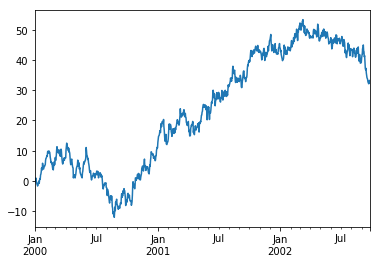

In [219]:
In [130]: ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
In [131]: ts = ts.cumsum()
In [132]: ts.plot()
plt.show()

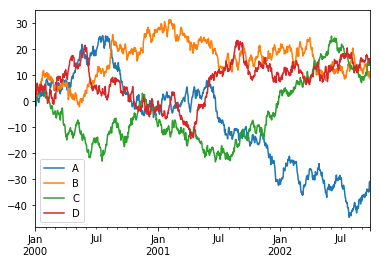

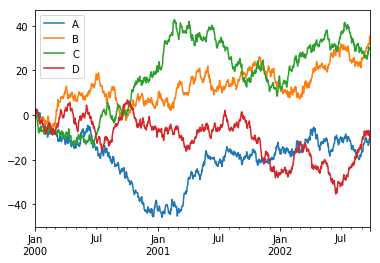

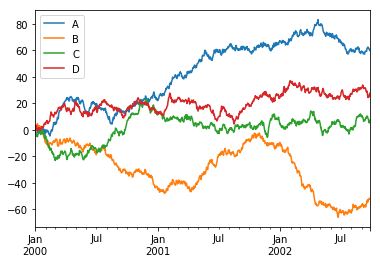

In [224]:
In [133]: df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
   .....: 
In [134]: df = df.cumsum()
In [135]: plt.figure(); df.plot();plt.legend(loc='best')
plt.show()

## 获取数据输入输出

In [227]:
df.to_csv('foo.csv')

In [229]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.196450,1.399540,-1.338785,0.449524
1,2000-01-02,1.506956,3.147448,-2.057726,0.065562
2,2000-01-03,0.342122,3.661747,-1.918044,0.877756
3,2000-01-04,0.347331,3.205481,-3.129846,2.179201
4,2000-01-05,0.219640,3.649840,-4.699956,3.083038
5,2000-01-06,-0.431392,1.757253,-4.511881,0.862403
6,2000-01-07,-0.899763,3.672579,-5.171521,-0.527268
7,2000-01-08,-2.298141,4.539543,-5.265390,-1.079961
8,2000-01-09,-1.366109,3.187192,-3.328281,-0.118902
9,2000-01-10,-2.059424,2.734241,-2.968027,-0.043682


In [230]:
df.to_hdf('foo.h5','df')
df

,A,B,C,D
2000-01-01,0.196450,1.399540,-1.338785,0.449524
2000-01-02,1.506956,3.147448,-2.057726,0.065562
2000-01-03,0.342122,3.661747,-1.918044,0.877756
2000-01-04,0.347331,3.205481,-3.129846,2.179201
2000-01-05,0.219640,3.649840,-4.699956,3.083038
2000-01-06,-0.431392,1.757253,-4.511881,0.862403
2000-01-07,-0.899763,3.672579,-5.171521,-0.527268
2000-01-08,-2.298141,4.539543,-5.265390,-1.079961
2000-01-09,-1.366109,3.187192,-3.328281,-0.118902
2000-01-10,-2.059424,2.734241,-2.968027,-0.043682


In [231]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.196450,1.399540,-1.338785,0.449524
2000-01-02,1.506956,3.147448,-2.057726,0.065562
2000-01-03,0.342122,3.661747,-1.918044,0.877756
2000-01-04,0.347331,3.205481,-3.129846,2.179201
2000-01-05,0.219640,3.649840,-4.699956,3.083038
2000-01-06,-0.431392,1.757253,-4.511881,0.862403
2000-01-07,-0.899763,3.672579,-5.171521,-0.527268
2000-01-08,-2.298141,4.539543,-5.265390,-1.079961
2000-01-09,-1.366109,3.187192,-3.328281,-0.118902
2000-01-10,-2.059424,2.734241,-2.968027,-0.043682


In [232]:
df.to_excel('foo.xlsx',sheet_name='Sheet1')
df

,A,B,C,D
2000-01-01,0.196450,1.399540,-1.338785,0.449524
2000-01-02,1.506956,3.147448,-2.057726,0.065562
2000-01-03,0.342122,3.661747,-1.918044,0.877756
2000-01-04,0.347331,3.205481,-3.129846,2.179201
2000-01-05,0.219640,3.649840,-4.699956,3.083038
2000-01-06,-0.431392,1.757253,-4.511881,0.862403
2000-01-07,-0.899763,3.672579,-5.171521,-0.527268
2000-01-08,-2.298141,4.539543,-5.265390,-1.079961
2000-01-09,-1.366109,3.187192,-3.328281,-0.118902
2000-01-10,-2.059424,2.734241,-2.968027,-0.043682


In [235]:
pd.read_excel('foo.xlsx','Sheet1',index_col=None,na_values=['NA'])

,A,B,C,D
2000-01-01,0.196450,1.399540,-1.338785,0.449524
2000-01-02,1.506956,3.147448,-2.057726,0.065562
2000-01-03,0.342122,3.661747,-1.918044,0.877756
2000-01-04,0.347331,3.205481,-3.129846,2.179201
2000-01-05,0.219640,3.649840,-4.699956,3.083038
2000-01-06,-0.431392,1.757253,-4.511881,0.862403
2000-01-07,-0.899763,3.672579,-5.171521,-0.527268
2000-01-08,-2.298141,4.539543,-5.265390,-1.079961
2000-01-09,-1.366109,3.187192,-3.328281,-0.118902
2000-01-10,-2.059424,2.734241,-2.968027,-0.043682


## 陷阱

In [240]:
>>> if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().